In [ ]:
import rdflib
from rdflib import URIRef
from rdflib.graph import ConjunctiveGraph
g = ConjunctiveGraph()

In [2]:
import pandas as pd
import json
from SPARQLWrapper import SPARQLWrapper, XML, JSON
from rdflib import Graph

In [23]:
def get_sparql_dataframe(service, query):
    #Helper function to convert SPARQL results into a pandas data frame
    sparql = SPARQLWrapper(service)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()
    
    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']
    
    out =[]
    for row in processed_results['results']['bindings']:
        item =[]
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)
    return pd.DataFrame(out, columns=cols)

In [24]:
wds = "http://dbpedia.org/sparql"

In [28]:
rq =""" 
PREFIX dbpediaO: <http://dbpedia.org/ontology/>

SELECT ?store ?keyPerson ?netIncome ?subsidiary ?type ?products WHERE {
?store a dbpediaO:Company.
?store dbo:industry dbr:Retail.
?store dbo:keyPerson ?keyPerson.
?store dbo:netIncome ?netIncome.
?store dbo:subsidiary ?subsidiary.
?store dbo:type ?type.
?store dbp:products ?products

}
"""

In [29]:
df = get_sparql_dataframe(wds,rq)

In [30]:
df.head()

,store,keyPerson,netIncome,subsidiary,type,products
0,http://dbpedia.org/resource/John_Lewis_Partner...,http://dbpedia.org/resource/Charlie_Mayfield,4.096E8,http://dbpedia.org/resource/John_Lewis_(depart...,http://dbpedia.org/resource/Partnership,"Clothing, watches & jewellery, giftwares, cosm..."
1,http://dbpedia.org/resource/John_Lewis_Partner...,http://dbpedia.org/resource/Charlie_Mayfield,4.096E8,http://dbpedia.org/resource/Waitrose,http://dbpedia.org/resource/Partnership,"Clothing, watches & jewellery, giftwares, cosm..."
2,http://dbpedia.org/resource/John_Lewis_Partner...,http://dbpedia.org/resource/Rob_Collins_(busin...,4.096E8,http://dbpedia.org/resource/John_Lewis_(depart...,http://dbpedia.org/resource/Partnership,"Clothing, watches & jewellery, giftwares, cosm..."
3,http://dbpedia.org/resource/John_Lewis_Partner...,http://dbpedia.org/resource/Rob_Collins_(busin...,4.096E8,http://dbpedia.org/resource/Waitrose,http://dbpedia.org/resource/Partnership,"Clothing, watches & jewellery, giftwares, cosm..."
4,http://dbpedia.org/resource/John_Lewis_Partner...,http://dbpedia.org/resource/Andy_Street,4.096E8,http://dbpedia.org/resource/John_Lewis_(depart...,http://dbpedia.org/resource/Partnership,"Clothing, watches & jewellery, giftwares, cosm..."


In [43]:
from rdflib import Graph
from SPARQLWrapper import SPARQLWrapper, RDF

# create empty graph
g = Graph() 

# execute SPARQL CONSTRUCT query to get a set of RDF triples
sparql = SPARQLWrapper("http://dbpedia.org/sparql")
sparql.addDefaultGraph("http://dbpedia.org")
query = """
PREFIX dbpediaO: <http://dbpedia.org/ontology/>
PREFIX dbpedia: <http://dbpedia.org/resource/>

CONSTRUCT { 
    ?store a dbpediaO:Company.
    ?store dbo:keyPerson ?keyPerson.
    ?store dbo:netIncome ?netIncome.
    ?store dbo:subsidiary ?subsidiary.
    ?store dbo:type ?type.
    ?store dbp:products ?products
    } WHERE{ 
     ?store dbo:industry dbr:Retail.
    }
"""
sparql.setQuery(query)
try : 
    sparql.setReturnFormat(RDF)
    results = sparql.query()
    triples = results.convert() # this converts directly to an RDFlib Graph object
except: 
    print ("query failed")


# add triples to graph
g += triples

C:\ProgramData\Anaconda3\lib\site-packages\SPARQLWrapper\Wrapper.py:801: RuntimeWarning: Sending Accept header '*/*' because unexpected returned format 'rdf' in a 'CONSTRUCT' SPARQL query form
  warnings.warn("Sending Accept header '*/*' because unexpected returned format '%s' in a '%s' SPARQL query form" % (self.returnFormat, self.queryType), RuntimeWarning)


In [2]:
from rdflib import Graph
from SPARQLWrapper import SPARQLWrapper, RDF

# create empty graph
g = Graph() 

# execute SPARQL CONSTRUCT query to get a set of RDF triples
sparql = SPARQLWrapper("http://dbpedia.org/sparql")
sparql.addDefaultGraph("http://dbpedia.org")
query = """
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX cat: <http://dbpedia.org/resource/Category:> 
CONSTRUCT {

  ?child rdf:type skos:Concept .
  ?childConcept skos:broader cat:Retail_companies_of_the_United_Kingdom .
  ?childConcept skos:prefLabel ?childLabel . 

  ?grandchildConcept rdf:type skos:Concept .
  ?grandchildConcept skos:broader ?childConcept . 
  ?grandchildConcept skos:prefLabel ?grandchildLabel . 

  ?greatgrandchildConcept rdf:type skos:Concept .
  ?greatgrandchildConcept skos:broader ?grandchildConcept . 
  ?greatgrandchildConcept skos:prefLabel ?greatgrandchildLabel .
  
  ?ggreatgrandchildConcept rdf:type skos:Concept .
  ?ggreatgrandchildConcept skos:broader ?greatgrandchildConcept . 
  ?ggreatgrandchildConcept skos:prefLabel ?ggreatgrandchildLabel .
}
WHERE {
  {
    ?childConcept skos:broader cat:Retail_companies_of_the_United_Kingdom .
    ?childConcept skos:prefLabel ?childLabel . 
  }
  UNION
  {
    ?childConcept skos:broader cat:Retail_companies_of_the_United_Kingdom .
    ?grandchildConcept skos:broader ?childConcept . 
    ?grandchildConcept skos:prefLabel ?grandchildLabel . 
  }
  UNION
  {
    ?childConcept skos:broader cat:Retail_companies_of_the_United_Kingdom .
    ?grandchildConcept skos:broader ?childConcept . 
    ?greatgrandchildConcept skos:broader ?grandchildConcept . 
    ?greatgrandchildConcept skos:prefLabel ?greatgrandchildLabel . 
  }
  UNION
  {
    ?childConcept skos:broader cat:Retail_companies_of_the_United_Kingdom .
    ?grandchildConcept skos:broader ?childConcept . 
    ?greatgrandchildConcept skos:broader ?grandchildConcept . 
    ?greatgrandchildConcept skos:prefLabel ?greatgrandchildLabel . 
    ?ggreatgrandchildConcept skos:prefLabel ?ggreatgrandchildLabel . 
  }
}
"""
sparql.setQuery(query)
try : 
    sparql.setReturnFormat(RDF)
    results = sparql.query()
    triples = results.convert() # this converts directly to an RDFlib Graph object
except: 
    print ("query failed")


# add triples to graph
g += triples



C:\ProgramData\Anaconda3\lib\site-packages\SPARQLWrapper\Wrapper.py:801: RuntimeWarning: Sending Accept header '*/*' because unexpected returned format 'rdf' in a 'CONSTRUCT' SPARQL query form
  warnings.warn("Sending Accept header '*/*' because unexpected returned format '%s' in a '%s' SPARQL query form" % (self.returnFormat, self.queryType), RuntimeWarning)


query failed


NameError: name 'triples' is not defined

{(rdflib.term.URIRef('http://dbpedia.org/resource/Category:Auto_dealerships_of_the_United_Kingdom'),
  rdflib.term.URIRef('http://dbpedia.org/resource/Category:Retail_companies_of_the_United_Kingdom')): Text(0.895731,-0.142783,'{}'),
 (rdflib.term.URIRef('http://dbpedia.org/resource/Category:Auto_dealerships_of_the_United_Kingdom'),
  rdflib.term.Literal('Auto dealerships of the United Kingdom', lang='en')): Text(-0.796553,-0.757149,'{}'),
 (rdflib.term.URIRef('http://dbpedia.org/resource/Category:Bakeries_of_the_United_Kingdom'),
  rdflib.term.URIRef('http://dbpedia.org/resource/Category:Retail_companies_of_the_United_Kingdom')): Text(1.54196,-0.30763,'{}'),
 (rdflib.term.URIRef('http://dbpedia.org/resource/Category:Bakeries_of_the_United_Kingdom'),
  rdflib.term.Literal('Bakeries of the United Kingdom', lang='en')): Text(1.14264,-1.25322,'{}'),
 (rdflib.term.URIRef('http://dbpedia.org/resource/Category:Bookshops_in_London'),
  rdflib.term.URIRef('http://dbpedia.org/resource/Category:

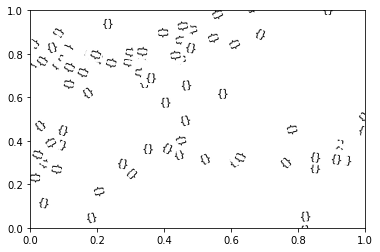

In [7]:
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
import networkx as nx
import matplotlib.pyplot as plt

G = rdflib_to_networkx_multidigraph(g)
#plot networkx instance of rdf graph
pos = nx.spring_layout(G, scale=2)
edge_labels = nx.get_edge_attributes(G, 'r')
nx.draw_networkx_edge_labels(G, pos, labels=edge_labels)
#nx.draw(G, with_labels=True)

In [30]:
import networkx as nx

from bokeh.io import show, output_file
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, BoxZoomTool, ResetTool
from bokeh.models.graphs import from_networkx
from bokeh.palettes import Spectral4

# Prepare Data
#G = nx.karate_club_graph()

# Show with Bokeh
plot = Plot(plot_width=900, plot_height=900, x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))
plot.title.text = "Knowledge Graph of UK Supermarket"

node_hover_tool = HoverTool(tooltips=[("store", "@index")])
plot.add_tools(node_hover_tool, BoxZoomTool(), ResetTool())

graph_renderer = from_networkx(G, nx.kamada_kawai_layout, scale=1, center=(0, 0))

graph_renderer.node_renderer.glyph = Circle(size=15, fill_color="grey")
graph_renderer.edge_renderer.glyph = MultiLine(line_color="green", line_alpha=0.8, line_width=1)
plot.renderers.append(graph_renderer)

output_file("interactive_graphs.html")
show(plot)

E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: edge_color [renderer: GlyphRenderer(id='fa4ed26d-ab20-4f95-804a-e5652ecd53e5', ...)]
